<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/linear_algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

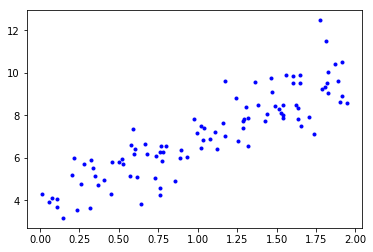

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 


X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

plt.plot(X,y,"b.")
plt.show()


In [0]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.82743126],
       [3.09979144]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.82743126],
       [10.02701414]])

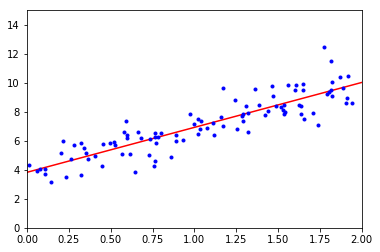

In [8]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()


In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_







(array([3.82743126]), array([[3.09979144]]))

In [11]:
lin_reg.predict(X_new)

array([[ 3.82743126],
       [10.02701414]])